In [19]:
import pandas as pd
import numpy as np 
import seaborn as sns


In [21]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [92]:
#sex balance 
sex = {}
for s in df["sex"]:
    if s not in sex:
        sex[s] = 0 
    sex[s] += 1
sex

{'male': 5406, 'female': 4552, 'unknown': 57}

In [17]:
c = 0 
balance = {}
for d in df["dx"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
    c += 1
print(c)
balance

10015


{'bkl': 1099,
 'nv': 6705,
 'df': 115,
 'mel': 1113,
 'vasc': 142,
 'bcc': 514,
 'akiec': 327}

In [18]:
dx  = []
nums = []
for d in balance:
    dx.append(d)
    nums.append(balance[d])
df = pd.DataFrame()
df["dx"] = dx
df["nums"] = nums

[Text(0.5, 0, 'Diagnosis'), Text(0, 0.5, 'Samples')]

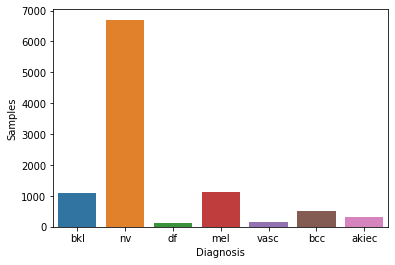

In [20]:
g = sns.barplot(x="dx", y="nums", data=df)
g.set(xlabel="Diagnosis", ylabel="Samples")

Age balance - male female ages 

[Text(0.5, 0, 'Sex'), Text(0, 0.5, 'Age')]

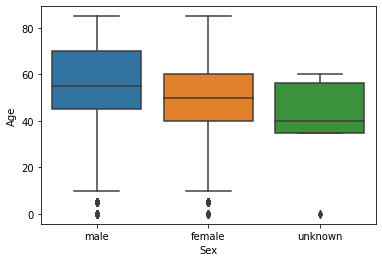

In [31]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")

g = sns.boxplot(x="sex", y="age", data=df)
g.set(xlabel="Sex", ylabel="Age")

Average incidence age for dx 

[Text(0.5, 0, 'Diagnosis'), Text(0, 0.5, 'Age')]

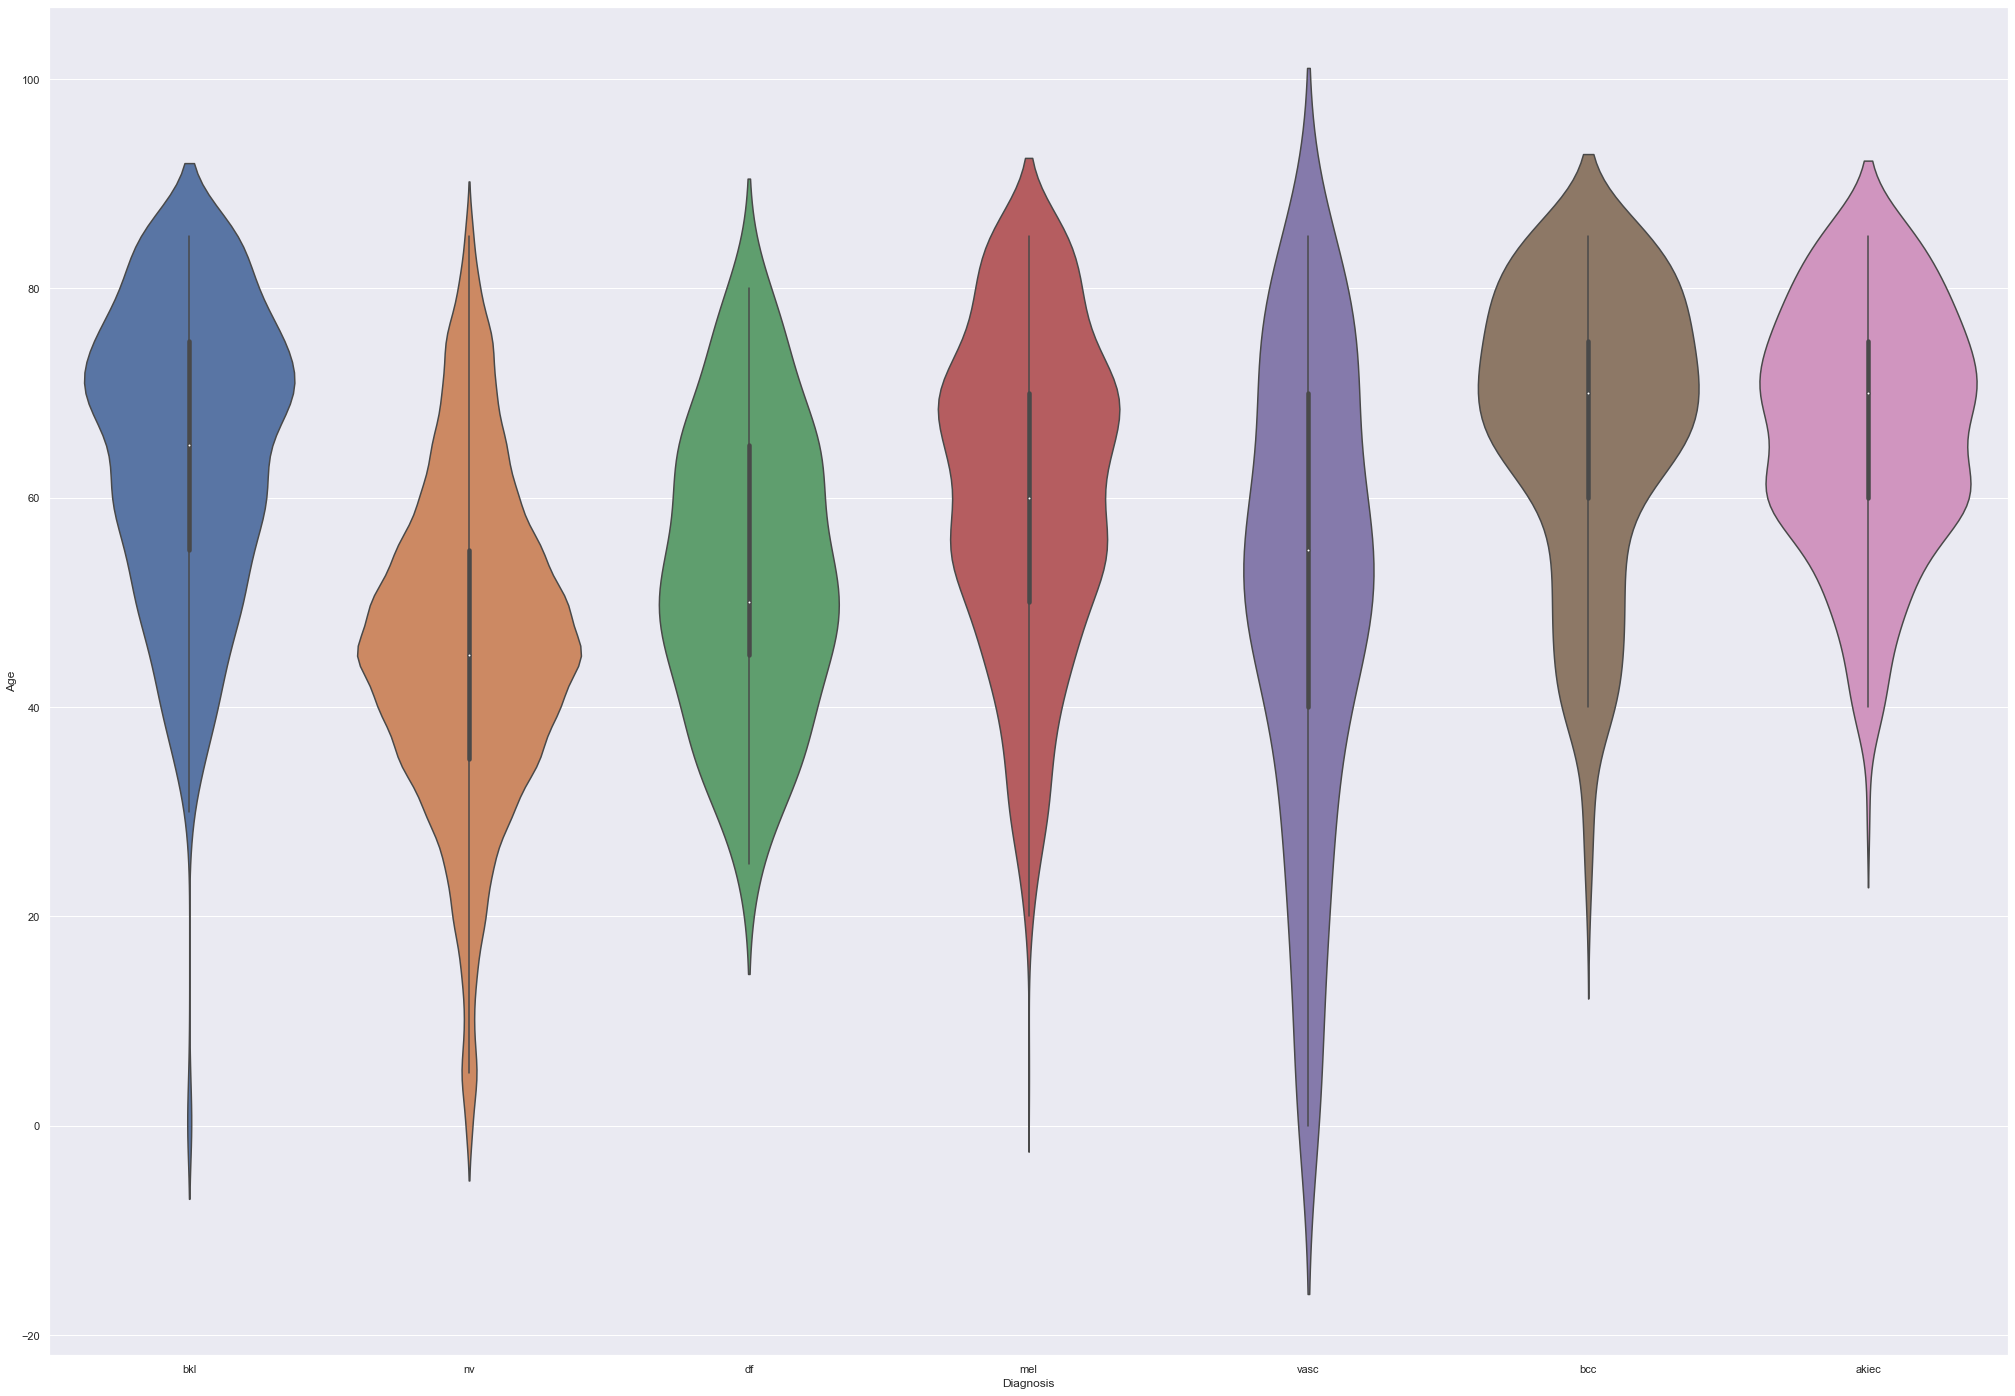

In [94]:
g = sns.violinplot(x="dx", y="age", data=df)
g.set(xlabel="Diagnosis", ylabel="Age")

Localization of condition

In [67]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")

c = 0 
balance = {}
for d in df["localization"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
    c += 1
print(c)

balance = dict(sorted(balance.items(), key=lambda item: item[1], reverse=True))
balance

10015


{'back': 2192,
 'lower extremity': 2077,
 'trunk': 1404,
 'upper extremity': 1118,
 'abdomen': 1022,
 'face': 745,
 'chest': 407,
 'foot': 319,
 'unknown': 234,
 'neck': 168,
 'scalp': 128,
 'hand': 90,
 'ear': 56,
 'genital': 48,
 'acral': 7}

[Text(0.5, 0, 'Localization'), Text(0, 0.5, 'Samples')]

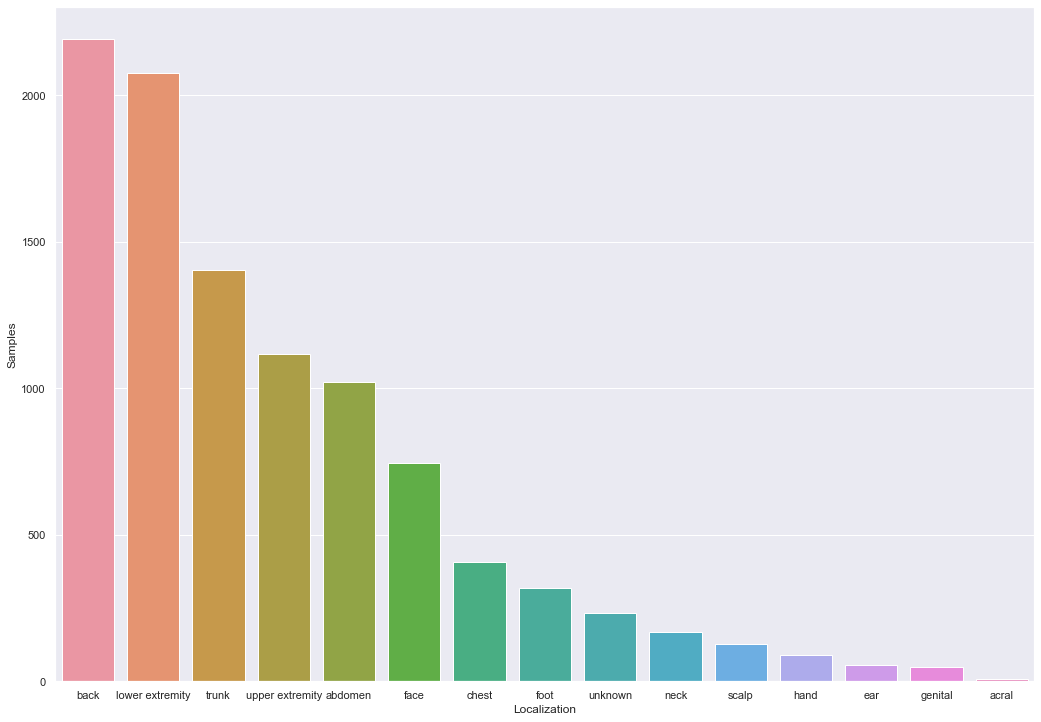

In [68]:
dx  = []
nums = []
for d in balance:
    dx.append(d)
    nums.append(balance[d])
df = pd.DataFrame()
df["dx"] = dx
df["nums"] = nums

sns.set(font_scale=1, rc={'figure.figsize':(1.5*11.7,1.5*8.27)})
g = sns.barplot(x="dx", y="nums", data=df)
g.set(xlabel="Localization", ylabel="Samples")

Histology distrib 

In [40]:
balance = {}
for d in df["dx_type"]:
    if d not in balance:
        balance[d] = 0 
    balance[d] += 1
balance

{'histo': 5340, 'consensus': 902, 'confocal': 69, 'follow_up': 3704}

[Text(0.5, 0, 'Localization'), Text(0, 0.5, 'Samples')]

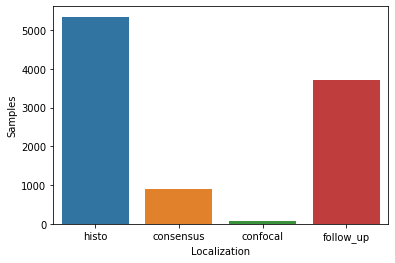

In [41]:
hx  = []
nums = []
for d in balance:
    hx.append(d)
    nums.append(balance[d])
df = pd.DataFrame()
df["hx"] = hx
df["nums"] = nums
g = sns.barplot(x="hx", y="nums", data=df)
g.set(xlabel="Localization", ylabel="Samples")

In [70]:
df = pd.read_csv("./HAM10000/HAM10000_metadata.csv")
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


[Text(0.5, 0, 'Localization'), Text(0, 0.5, 'Age')]

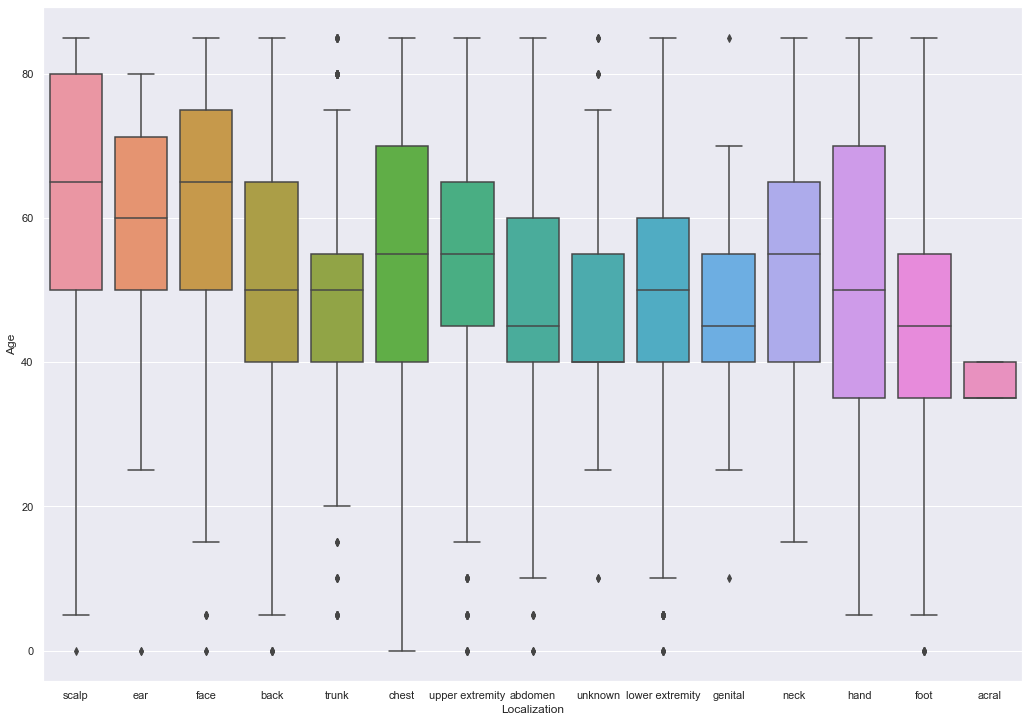

In [66]:
#age vs localization 
g = sns.boxplot(x="localization", y="age", data=df)
sns.set(font_scale=1, rc={'figure.figsize':(1.5*11.7,1.5*8.27)})
g.set(xlabel="Localization", ylabel="Age")

In [85]:
#number by diagnosis by sex 
m_balance = {}
f_balance = {}
for d,s in zip(list(df["dx"]), list(df["sex"])):
    if s == "male":
        if d not in m_balance:
            m_balance[d] = 0 
        m_balance[d] += 1
    else:
        if d not in f_balance:
            f_balance[d] = 0 
        f_balance[d] += 1

In [86]:
m_balance

{'bkl': 626,
 'nv': 3421,
 'df': 63,
 'mel': 689,
 'vasc': 69,
 'bcc': 317,
 'akiec': 221}

In [87]:
ndf = pd.DataFrame()
sexes = []
dxs = []
amounts = []

for d in m_balance:
    sexes.append("male")
    dxs.append(d)
    amounts.append(m_balance[d])

for d in f_balance:
    sexes.append("female")
    dxs.append(d)
    amounts.append(f_balance[d])

ndf["sex"] = sexes
ndf["dx"] = dxs 
ndf["nums"] = amounts 
ndf

,sex,dx,nums
0,male,bkl,626
1,male,nv,3421
2,male,df,63
3,male,mel,689
4,male,vasc,69
5,male,bcc,317
6,male,akiec,221
7,female,bkl,473
8,female,df,52
9,female,nv,3284


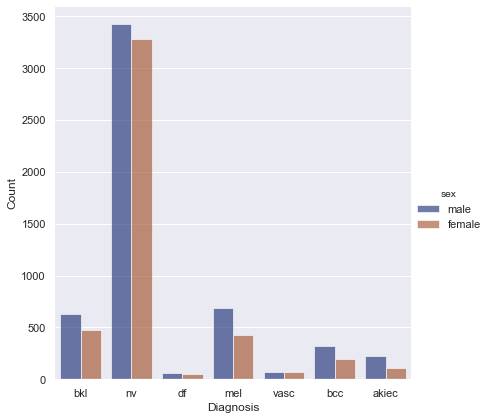

In [88]:
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="dx", y="nums", hue="sex",
     palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("Diagnosis", "Count")
    g.legend.set_title("Sex")
except:
    pass

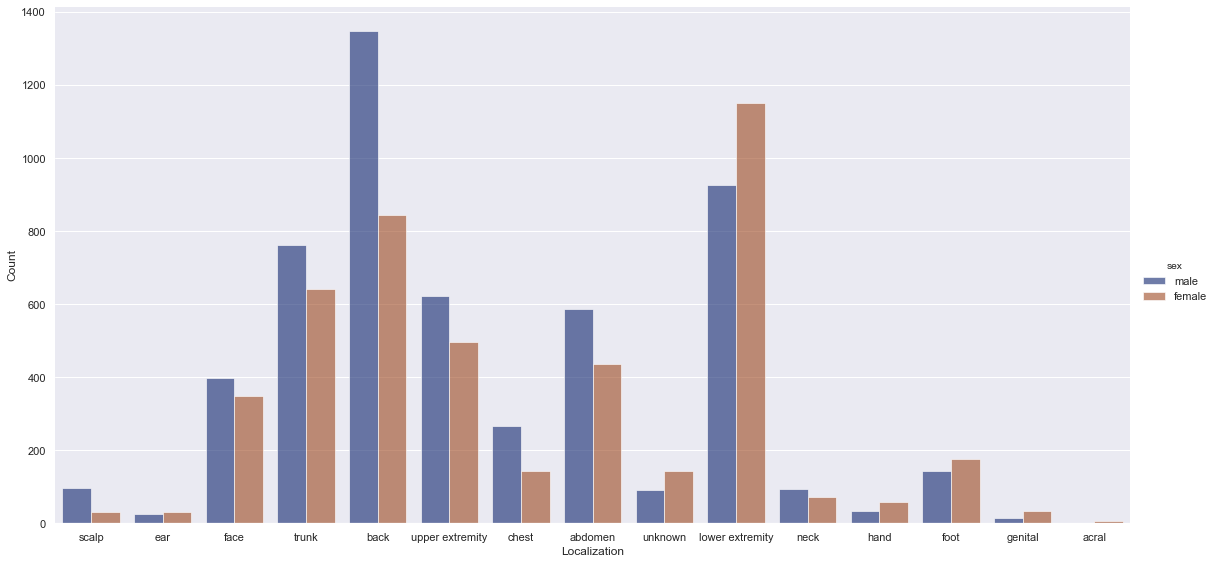

In [93]:
#number by localization by sex 
#number by diagnosis by sex 
m_balance = {}
f_balance = {}
for d,s in zip(list(df["localization"]), list(df["sex"])):
    if s == "male":
        if d not in m_balance:
            m_balance[d] = 0 
        m_balance[d] += 1
    else:
        if d not in f_balance:
            f_balance[d] = 0 
        f_balance[d] += 1
m_balance
ndf = pd.DataFrame()
sexes = []
ls = []
amounts = []

for d in m_balance:
    sexes.append("male")
    ls.append(d)
    amounts.append(m_balance[d])

for d in f_balance:
    sexes.append("female")
    ls.append(d)
    amounts.append(f_balance[d])

ndf["sex"] = sexes
ndf["localization"] = ls
ndf["nums"] = amounts 
ndf
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="localization", y="nums", hue="sex",
     palette="dark", alpha=.6, height=8, aspect =2,
    )
    g.despine(left=True)
    g.set_axis_labels("Localization", "Count")
    g.legend.set_title("Sex")
except:
    pass

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


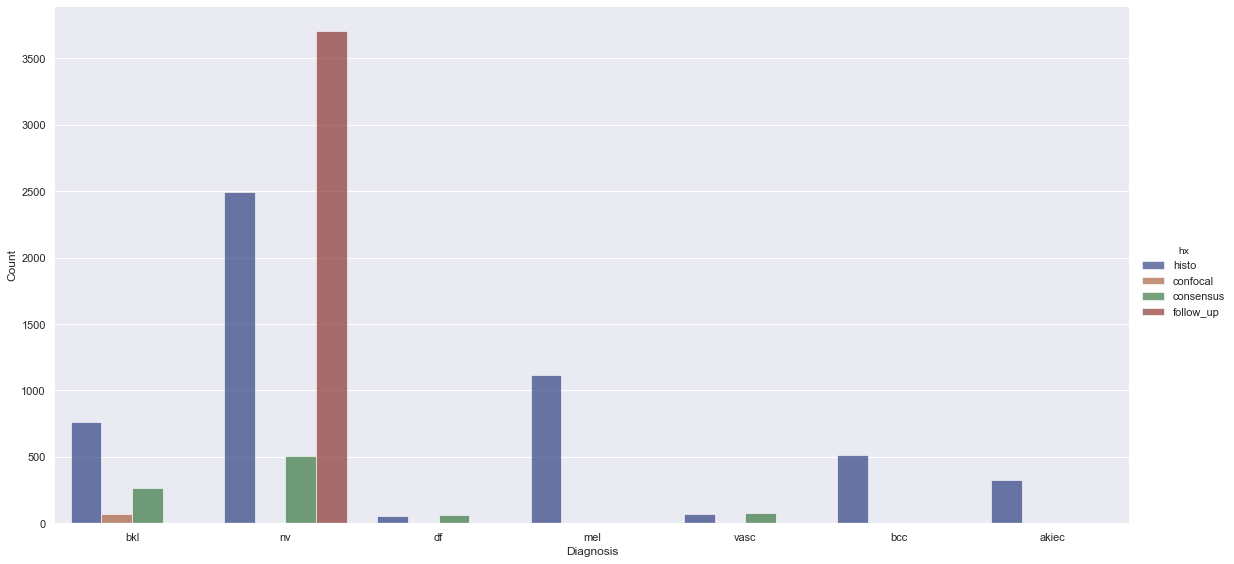

In [101]:
histo = {}
for d, h in zip(list(df["dx"]), list(df["dx_type"])):
    if d not in histo: 
        histo[d] = {}
    if h not in histo[d]:
        histo[d][h] = 0 
    histo[d][h] += 1 
histo

dx = []
hx = []
count = []
for d in histo:
    for h in histo[d]:
        dx.append(d)
        hx.append(h)
        count.append(histo[d][h])

ndf = pd.DataFrame()
ndf["dx"] = dx
ndf["hx"] = hx
ndf["count"] = count 
ndf
try:
    g = sns.catplot(
    data=ndf, kind="bar",
    x="dx", y="count", hue="hx",
     palette="dark", alpha=.6, height=8, aspect =2,
    )
    g.despine(left=True)
    g.set_axis_labels("Diagnosis", "Count")
    g.legend.set_title("Histology")
except:
    pass

Actual image EDA 

In [115]:
import os 
from tqdm import tqdm 
import numpy as np 
from PIL import Image


In [111]:
def get_dims(file):
    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

In [119]:
sds = ["./HAM10000/HAM10000_images_part_1/", "./HAM10000/HAM10000_images_part_2/"]
hs = []
ws = []
for sd in sds:
    filelist = [sd + f for f in os.listdir(sd)]
    for file in tqdm(filelist):
        h, w  = get_dims(file)
        hs.append(h)
        ws.append(w)


100%|██████████| 5015/5015 [01:33<00:00, 53.88it/s]
